In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)

Using TensorFlow backend.


In [2]:
# sin波作成
def sin(x, T=100):
      return np.sin(2.0 * np.pi * x / T) 

In [3]:
# ノイズ化
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=1.0, high=1.0, size=len(x))
    return sin(x) + noise

In [4]:
T = 100
f = toy_problem(T)

In [5]:
length_of_sequences = 2 * T
maxlen = 25

In [6]:
data = []
target = []

In [7]:
for i in range(0, length_of_sequences - maxlen + 1):
    data.append(f[i: i + maxlen])
    target.append(f[i + maxlen])


In [8]:
X = np.array(data).reshape(len(data), maxlen, 1)
Y = np.array(target).reshape(len(data), 1)

In [9]:
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

In [10]:
print(X.shape)
print(Y.shape)

(176, 25, 1)
(176, 1)


In [11]:
print(len(data) )
print(N_train)
print(N_validation)

176
158
18


In [12]:
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)

In [13]:
n_in = len(X[0][0])
n_hidden = 20
n_out = len(Y[0])

In [14]:
print(n_in)
print(n_out)

1
1


In [15]:
def weight_variable(shape, name=None):
    return np.random.normal(scale=.01, size=shape)

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)



In [17]:
model = Sequential()
model.add(SimpleRNN(n_hidden,
                   kernel_initializer=weight_variable,
                   input_shape=(maxlen, n_in)))
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation("linear"))



In [18]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [19]:
model.compile(loss='mean_squared_error',
              optimizer=optimizer)


In [20]:
epochs = 500
batch_size= 10


In [21]:
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[early_stopping])



Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 0s - loss: 0.4931 - val_loss: 0.3785
Epoch 2/500
158/158 [==============================] - 0s - loss: 0.3906 - val_loss: 0.2563
Epoch 3/500
158/158 [==============================] - 0s - loss: 0.2164 - val_loss: 0.0888
Epoch 4/500
158/158 [==============================] - 0s - loss: 0.0843 - val_loss: 0.0458
Epoch 5/500
158/158 [==============================] - 0s - loss: 0.0636 - val_loss: 0.0516
Epoch 6/500
158/158 [==============================] - 0s - loss: 0.0455 - val_loss: 0.0381
Epoch 7/500
158/158 [==============================] - 0s - loss: 0.0340 - val_loss: 0.0291
Epoch 8/500
158/158 [==============================] - 0s - loss: 0.0324 - val_loss: 0.0281
Epoch 9/500
158/158 [==============================] - 0s - loss: 0.0256 - val_loss: 0.0230
Epoch 10/500
158/158 [==============================] - 0s - loss: 0.0185 - val_loss: 0.0223
Epoch 11/500
158/158 [============

158/158 [==============================] - 0s - loss: 1.4574e-04 - val_loss: 3.5202e-05
Epoch 85/500
158/158 [==============================] - 0s - loss: 8.3064e-05 - val_loss: 7.0584e-05
Epoch 86/500
158/158 [==============================] - 0s - loss: 6.2084e-05 - val_loss: 4.3937e-05
Epoch 87/500
158/158 [==============================] - 0s - loss: 4.8695e-05 - val_loss: 7.2691e-05
Epoch 88/500
158/158 [==============================] - 0s - loss: 5.5675e-05 - val_loss: 4.9804e-05
Epoch 89/500
158/158 [==============================] - 0s - loss: 5.4361e-05 - val_loss: 2.9574e-05
Epoch 90/500
158/158 [==============================] - 0s - loss: 4.4829e-05 - val_loss: 3.9873e-05
Epoch 91/500
158/158 [==============================] - 0s - loss: 5.6532e-05 - val_loss: 1.6416e-04
Epoch 92/500
158/158 [==============================] - 0s - loss: 8.5661e-05 - val_loss: 5.3704e-05
Epoch 93/500
158/158 [==============================] - 0s - loss: 7.0854e-05 - val_loss: 6.6061e-05
Epo

In [47]:
truncate = maxlen
Z = X[:1]

In [48]:
original = [f[i] for i in range(maxlen)]
predicted = [None for i in range(maxlen)]

In [49]:
for i in range(length_of_sequences - maxlen + 1):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(maxlen, n_in)[1:], y_),
        axis=0).reshape(1, maxlen, n_in)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))


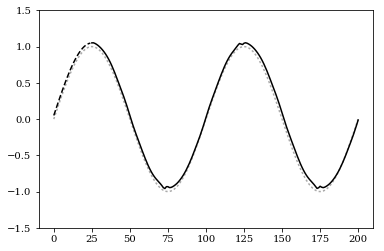

In [50]:
plt.rc('font', family='serif')
plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(toy_problem(T, ampl=0), linestyle='dotted', color='#aaaaaa')
plt.plot(original, linestyle='dashed', color='black')
plt.plot(predicted, color='black')
plt.show()